In [157]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from src.pipeline.list_objects import List_objects
from src.pipeline.stack import Stack
from src.pipeline.savartphot import Savartphot
import matplotlib.pyplot as plt
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [158]:
#l = List_objects("/home/pi/Programs/python-programs/savartPhot/var/pipeline_config_files/config_list_objects.cfg")
#l.show_objects("/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/all/")
#l.create_stars_list("/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/all/")
st = Stack("/home/pi/Programs/python-programs/savartPhot/var/pipeline_config_files/config_stack.cfg",
           "/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/hd204827/",
           32, "/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/hd204827/output", log_file_name='stack')
im_list = st._create_images_list("/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/hd204827/")
st.process()

In [160]:
sp = Savartphot("/home/pi/Programs/python-programs/savartPhot/var/pipeline_config_files/config_savartphot.cfg",
                "/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/hd204827/output/",
                "/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/hd204827/output/coo.dat",
                "/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/hd204827/phot_output/"
               )

In [161]:
sp.make_phot()

        Use SourceCatalog.to_table() instead. [src.pipeline.savartphot]


i:1, a:14.875069784177288 pix, b:12.323326332924307 pix, pos:514.8080284106779,517.725459877898
i:2, a:15.177256959982053 pix, b:12.912336519711117 pix, pos:542.2963134745597,489.4201137130922
i:1, a:14.048914399008687 pix, b:11.657409723648902 pix, pos:514.6536205944516,517.5176983567852
i:2, a:13.96596992662438 pix, b:12.209538605062878 pix, pos:542.1080629456293,489.1661777177498
i:1, a:14.751730239172693 pix, b:12.195149572563977 pix, pos:514.4817734591252,517.2726948692094
i:2, a:14.774913874187884 pix, b:12.437490597615232 pix, pos:541.9909029209431,489.0273900145617
i:1, a:14.853943274948946 pix, b:12.716941778586653 pix, pos:523.977805974322,508.6159763804444
i:2, a:14.972105560103298 pix, b:12.429920000457189 pix, pos:524.8906145122093,469.3637839535768
i:1, a:14.920168630502578 pix, b:12.103765714066256 pix, pos:523.9931897932485,508.25811845113645
i:2, a:14.475047637578168 pix, b:12.07534491039782 pix, pos:524.8957293930271,469.11032483784487
i:1, a:14.332535613957521 pix, b

In [71]:
tab = np.loadtxt('/home/pi/kolchoz/savarts/dane_suhora/2017-11-16/test/phot_output/PD.csv', delimiter=',')

In [72]:
tab[:,0]

array([2458074.189574 , 2458074.1905055, 2458074.1926015, 2458074.194697 ])

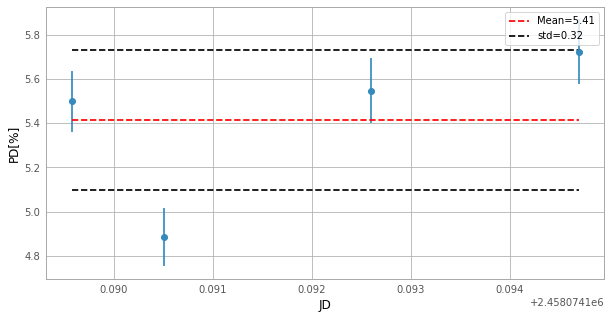

In [87]:
plt.rcParams['figure.figsize'] = 10, 5

fig = plt.figure()
ax = fig.add_subplot(111)
mean = [np.mean(tab[:,1])]*len(tab[:,0])
std = [np.std(tab[:,1])]*len(tab[:,0])
ax.errorbar(tab[:,0], tab[:,1], yerr=tab[:,2], fmt='o')
ax.plot(tab[:,0], mean, label='Mean={:.2f}'.format(np.mean(tab[:,1])), linestyle='--', c='r')
ax.plot(tab[:,0], mean-np.std(tab[:,1]), linestyle='--', c='k')
ax.plot(tab[:,0], mean+np.std(tab[:,1]), label='std={:.2f}'.format(np.std(tab[:,1])), linestyle='--', c='k')
ax.set_xlabel('JD')
ax.set_ylabel('PD[%]')
plt.legend(loc='upper right')